In [29]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")


import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier
import xgboost
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score

In [30]:
data_train_final = pd.read_csv('input/appstore_games_2.csv',engine = 'python',encoding='UTF-8')

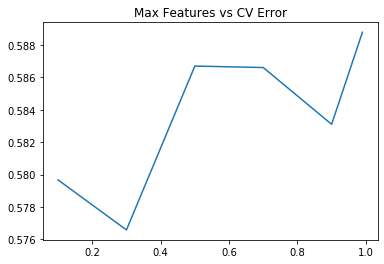

In [31]:
X = data_train_final.drop(columns = ["Great_App"])
y = data_train_final["Great_App"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestClassifier(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
    
plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error");

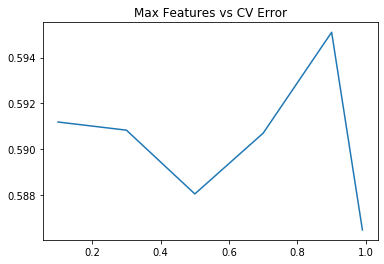

In [33]:
max_features_1 = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features_1:
    clf = GradientBoostingClassifier(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
    
plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error");

In [34]:
rf = RandomForestClassifier(n_estimators = 200)

param_grid = {'n_estimators': [300, 500, 750, 850], 'max_features': [0.3], 'max_depth': [10, 15, 20, 25], 'criterion': ['gini']}
cv_rf = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = "roc_auc", cv = 5)
cv_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [35]:
cv_rf.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 0.3,
 'n_estimators': 850}

In [36]:
cv_rf.best_score_

0.7384261441214756

In [57]:
final_model_rf = cv_rf.best_estimator_
final_model_rf.fit(X_train,y_train)
print(roc_auc_score(y_test,final_model_rf.predict(X_test)))

0.693827641288994


In [38]:
gbdt = GradientBoostingClassifier()
param_grid2 = {'n_estimators': [100, 200, 350, 550], 'min_samples_split': [100, 200, 300, 250], 'min_samples_leaf': [10, 20, 30, 40], 'max_depth': [10, 15, 20], 'max_features': [0.3,0.99]}
cv_gbdt = GridSearchCV(estimator = gbdt, param_grid = param_grid2, scoring = "roc_auc", cv = 5)
cv_gbdt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...
                                                  random_state=None,

In [39]:
cv_gbdt.best_params_

{'max_depth': 15,
 'max_features': 0.3,
 'min_samples_leaf': 20,
 'min_samples_split': 200,
 'n_estimators': 100}

In [40]:
cv_gbdt.best_score_

0.7204303670125044

In [58]:
final_model_gbdt = cv_gbdt.best_estimator_
final_model_gbdt.fit(X_train,y_train)
print(roc_auc_score(y_test,final_model_gbdt.predict(X_test)))

0.6722299964355964


In [42]:
xgb = xgboost.XGBClassifier()
param_grid3 = {'n_estimators': [15, 20, 25, 30], 'scale_pos_weight': [1], 'max_depth': [10, 15, 20, 25], 'colsample_bytree': [0.9, 0.95, 1], 'subsample': [0.9, 0.95, 1], 'learning_rate': [0.01, 0.05, 0.1]}
cv_xgb = GridSearchCV(estimator = xgb, param_grid = param_grid3, scoring = "roc_auc", cv = 5)
cv_xgb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_l...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.9, 0.95, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [10, 15, 20,

In [43]:
cv_xgb.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 30,
 'scale_pos_weight': 1,
 'subsample': 0.9}

In [44]:
cv_xgb.best_score_

0.7149684834657557

In [61]:
final_model_xgb = cv_xgb.best_estimator_
final_model_xgb.fit(X_train,y_train)
print(roc_auc_score(y_test,final_model_xgb.predict(X_test)))

0.6754313588298195


In [46]:
xgb_f = xgboost.XGBClassifier(colsample_bytree = 0.9, n_estimators = 30, learning_rate = 0.1, max_depth = 10, subsample = 0.9 )
gbdt_f = GradientBoostingClassifier(n_estimators = 100, max_features = 0.99, min_samples_leaf = 20, min_samples_split = 200, max_depth = 15)
rf_f = RandomForestClassifier(criterion = 'gini', max_depth = 15, max_features = 0.3, n_estimators = 850)
lr = LogisticRegression()
sclf = StackingClassifier(classifiers = [xgb_f, gbdt_f, rf_f], meta_classifier = lr)
sclf.fit(X_train, y_train)

/Users/yukiaragaki/env_workspaces/Project_Kaggle/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


StackingClassifier(average_probas=False,
                   classifiers=[XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.9, gamma=0,
                                              learning_rate=0.1,
                                              max_delta_step=0, max_depth=10,
                                              min_child_weight=1, missing=None,
                                              n_estimators=30, n_jobs=1,
                                              nthread=None,
                                              objective='binary:logistic',
                                              random_state=0, reg_alpha=0,
                                              reg_lambda...
                   meta_classifier=LogisticRegression(C=1.0, class_weight=None,
                       

In [90]:
print(roc_auc_score(y_test,sclf.predict(X_test)))

0.6940355648259383


In [54]:
final_model_f = cv_rf.best_estimator_
final_model_f.fit(X_train,y_train)
print(roc_auc_score(y_test,final_model_f.predict(X_test)))

0.7027452507623864


In [84]:
classifiers = ['Random Forests', 'GBDT', 'Xgboost', 'Three Stacking']
accuracy = [roc_auc_score(y_test,final_model_rf.predict(X_test)), roc_auc_score(y_test,final_model_gbdt.predict(X_test)), roc_auc_score(y_test,final_model_xgb.predict(X_test)), roc_auc_score(y_test,sclf.predict(X_test))]


In [85]:
Output = pd.DataFrame({'accuracy':accuracy}, index=classifiers)

In [86]:
Output.head()

,accuracy
Random Forests,0.693828
GBDT,0.672230
Xgboost,0.675431
Three Stacking,0.694036
